# PVI Annotated Data Analysis

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
annotated_data = pd.read_json("/home/mlynatom/data/generated_annotations/cs/annotated_cs.jsonl",orient="records", lines=True)

In [4]:
annotated_data

,id,text,index,claim,evidence,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,dataset_label,label,Comments
0,613,Harry se po napadení mozkomorů přestěhoval do ...,236441,Harry se po napadení mozkomorů přestěhoval do ...,Harry Potter a Fénixův řád Obsah. Kniha popi...,1.543819,2.963582,False,1,0.866706,-1.419763,0,[Decidable-Correct],[]
1,614,Celý název fotbalového klubu PŠC Pezinok je PŠ...,134823,Celý název fotbalového klubu PŠC Pezinok je PŠ...,PŠC Pezinok PŠC Pezinok (celým názvem: Pezins...,1.543819,5.574169,False,1,0.978710,-4.030349,0,[Decidable-Mislabeled],[]
2,615,Leander Paes byl vítězem mužské čtyřhry na ASB...,142526,Leander Paes byl vítězem mužské čtyřhry na ASB...,ASB Classic 2016 – mužská čtyřhra Do soutěže ...,1.543819,2.838417,False,1,0.858180,-1.294597,0,[Decidable-Mislabeled],[]
3,616,Přemysla Otakara I. byla první manželkou Božis...,177854,Přemysla Otakara I. byla první manželkou Božis...,Božislava Přemyslovna Božislava (nejpozději 1...,1.543819,6.573576,False,1,0.989348,-5.029757,0,[Decidable-Mislabeled],[]
4,617,AOMC řídila armádu raketových sil.\n\n #######...,11355,AOMC řídila armádu raketových sil.,Army Ballistic Missile Agency Dalším projekte...,1.543819,4.284806,False,1,0.941442,-2.740987,0,[Decidable-Mislabeled],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,710,Winona Ryderová hrála hlavní postavu v první s...,282323,Winona Ryderová hrála hlavní postavu v první s...,Stranger Things Druhá řada. Na podzim roku 1...,1.482131,0.000147,True,2,0.999898,1.481984,2,[Decidable-Correct],[]
98,711,VfB Stuttgart je pětinásobným mistrem německé ...,132683,VfB Stuttgart je pětinásobným mistrem německé ...,Stuttgart Období nacismu. V roce 1933 se cho...,1.482131,0.000167,True,2,0.999884,1.481965,2,[Decidable-Correct],[]
99,712,Majitelé brandýského panství přestoupili k bra...,106666,Majitelé brandýského panství přestoupili k bra...,Kolegiátní kapitula sv. Kosmy a Damiána ve Sta...,1.482131,0.000164,True,2,0.999886,1.481967,2,[Decidable-Correct],[]
100,713,Fiorelli se v roce 1860 zapojil do výzkumu.\n\...,11513,Fiorelli se v roce 1860 zapojil do výzkumu.,Pompeje Jedinečný pohled. Každopádně nám měs...,1.482131,0.000166,True,2,0.999885,1.481965,2,[Decidable-Correct],[]


In [5]:
annotated_data["label"] = annotated_data.apply(lambda x: x.label[0], axis=1)

In [36]:
def func(x):
    if x.label == "Decidable-Correct":
        return 0
    elif x.label == "Decidable-Mislabeled":
        return 1
    else: return 2

In [37]:
annotated_data["correct"] = annotated_data.apply(func, axis=1)

In [38]:
annotated_data

,id,text,index,claim,evidence,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,dataset_label,label,Comments,correct
0,613,Harry se po napadení mozkomorů přestěhoval do ...,236441,Harry se po napadení mozkomorů přestěhoval do ...,Harry Potter a Fénixův řád Obsah. Kniha popi...,1.543819,2.963582,False,1,0.866706,-1.419763,0,Decidable-Correct,[],0
1,614,Celý název fotbalového klubu PŠC Pezinok je PŠ...,134823,Celý název fotbalového klubu PŠC Pezinok je PŠ...,PŠC Pezinok PŠC Pezinok (celým názvem: Pezins...,1.543819,5.574169,False,1,0.978710,-4.030349,0,Decidable-Mislabeled,[],1
2,615,Leander Paes byl vítězem mužské čtyřhry na ASB...,142526,Leander Paes byl vítězem mužské čtyřhry na ASB...,ASB Classic 2016 – mužská čtyřhra Do soutěže ...,1.543819,2.838417,False,1,0.858180,-1.294597,0,Decidable-Mislabeled,[],1
3,616,Přemysla Otakara I. byla první manželkou Božis...,177854,Přemysla Otakara I. byla první manželkou Božis...,Božislava Přemyslovna Božislava (nejpozději 1...,1.543819,6.573576,False,1,0.989348,-5.029757,0,Decidable-Mislabeled,[],1
4,617,AOMC řídila armádu raketových sil.\n\n #######...,11355,AOMC řídila armádu raketových sil.,Army Ballistic Missile Agency Dalším projekte...,1.543819,4.284806,False,1,0.941442,-2.740987,0,Decidable-Mislabeled,[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,710,Winona Ryderová hrála hlavní postavu v první s...,282323,Winona Ryderová hrála hlavní postavu v první s...,Stranger Things Druhá řada. Na podzim roku 1...,1.482131,0.000147,True,2,0.999898,1.481984,2,Decidable-Correct,[],0
98,711,VfB Stuttgart je pětinásobným mistrem německé ...,132683,VfB Stuttgart je pětinásobným mistrem německé ...,Stuttgart Období nacismu. V roce 1933 se cho...,1.482131,0.000167,True,2,0.999884,1.481965,2,Decidable-Correct,[],0
99,712,Majitelé brandýského panství přestoupili k bra...,106666,Majitelé brandýského panství přestoupili k bra...,Kolegiátní kapitula sv. Kosmy a Damiána ve Sta...,1.482131,0.000164,True,2,0.999886,1.481967,2,Decidable-Correct,[],0
100,713,Fiorelli se v roce 1860 zapojil do výzkumu.\n\...,11513,Fiorelli se v roce 1860 zapojil do výzkumu.,Pompeje Jedinečný pohled. Každopádně nám měs...,1.482131,0.000166,True,2,0.999885,1.481965,2,Decidable-Correct,[],0


<AxesSubplot:xlabel='correct', ylabel='PVI'>

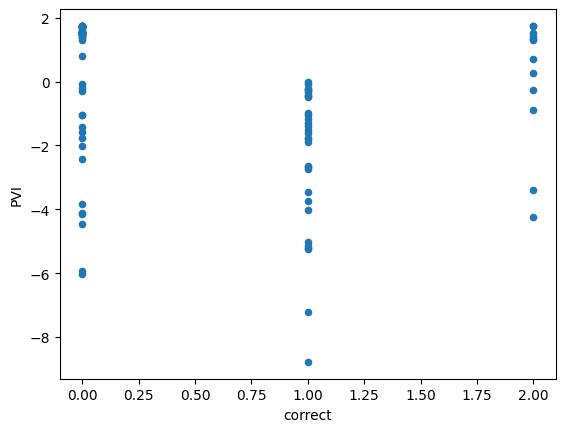

In [39]:
annotated_data.plot(x="correct", y="PVI", kind="scatter")

In [40]:
sub_data = annotated_data[annotated_data["correct"] <2]

In [41]:
sub_data

,id,text,index,claim,evidence,H_yb,H_yx,correct_yx,predicted_label,predicted_score,PVI,dataset_label,label,Comments,correct
0,613,Harry se po napadení mozkomorů přestěhoval do ...,236441,Harry se po napadení mozkomorů přestěhoval do ...,Harry Potter a Fénixův řád Obsah. Kniha popi...,1.543819,2.963582,False,1,0.866706,-1.419763,0,Decidable-Correct,[],0
1,614,Celý název fotbalového klubu PŠC Pezinok je PŠ...,134823,Celý název fotbalového klubu PŠC Pezinok je PŠ...,PŠC Pezinok PŠC Pezinok (celým názvem: Pezins...,1.543819,5.574169,False,1,0.978710,-4.030349,0,Decidable-Mislabeled,[],1
2,615,Leander Paes byl vítězem mužské čtyřhry na ASB...,142526,Leander Paes byl vítězem mužské čtyřhry na ASB...,ASB Classic 2016 – mužská čtyřhra Do soutěže ...,1.543819,2.838417,False,1,0.858180,-1.294597,0,Decidable-Mislabeled,[],1
3,616,Přemysla Otakara I. byla první manželkou Božis...,177854,Přemysla Otakara I. byla první manželkou Božis...,Božislava Přemyslovna Božislava (nejpozději 1...,1.543819,6.573576,False,1,0.989348,-5.029757,0,Decidable-Mislabeled,[],1
4,617,AOMC řídila armádu raketových sil.\n\n #######...,11355,AOMC řídila armádu raketových sil.,Army Ballistic Missile Agency Dalším projekte...,1.543819,4.284806,False,1,0.941442,-2.740987,0,Decidable-Mislabeled,[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,710,Winona Ryderová hrála hlavní postavu v první s...,282323,Winona Ryderová hrála hlavní postavu v první s...,Stranger Things Druhá řada. Na podzim roku 1...,1.482131,0.000147,True,2,0.999898,1.481984,2,Decidable-Correct,[],0
98,711,VfB Stuttgart je pětinásobným mistrem německé ...,132683,VfB Stuttgart je pětinásobným mistrem německé ...,Stuttgart Období nacismu. V roce 1933 se cho...,1.482131,0.000167,True,2,0.999884,1.481965,2,Decidable-Correct,[],0
99,712,Majitelé brandýského panství přestoupili k bra...,106666,Majitelé brandýského panství přestoupili k bra...,Kolegiátní kapitula sv. Kosmy a Damiána ve Sta...,1.482131,0.000164,True,2,0.999886,1.481967,2,Decidable-Correct,[],0
100,713,Fiorelli se v roce 1860 zapojil do výzkumu.\n\...,11513,Fiorelli se v roce 1860 zapojil do výzkumu.,Pompeje Jedinečný pohled. Každopádně nám měs...,1.482131,0.000166,True,2,0.999885,1.481965,2,Decidable-Correct,[],0


In [31]:
stats.pointbiserialr(x=annotated_data["correct"], y=annotated_data["PVI"])

PointbiserialrResult(correlation=0.4243907002425232, pvalue=8.776429194864904e-06)

<AxesSubplot:xlabel='correct', ylabel='PVI'>

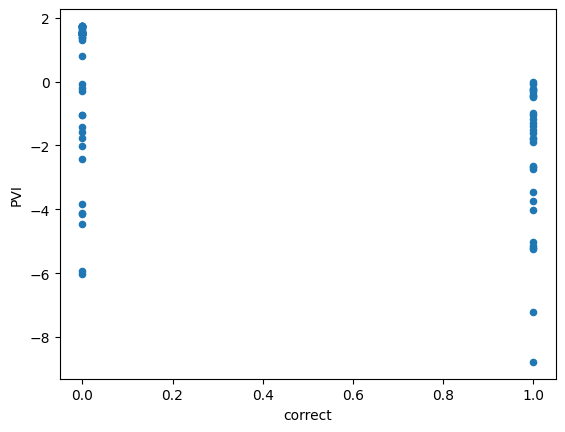

In [43]:
sub_data.plot(x="correct", y="PVI", kind="scatter")

In [42]:
stats.pointbiserialr(x=sub_data["correct"], y=sub_data["PVI"])

PointbiserialrResult(correlation=-0.5303707335145498, pvalue=7.596116756269066e-08)

In [7]:
bellow_zero = annotated_data[annotated_data.PVI < 0]
above_zero = annotated_data[annotated_data.PVI >=0]

In [8]:
labels, counts = np.unique(bellow_zero["label"].to_numpy(), return_counts=True)
print(labels)
print(counts)
percentage = (counts / np.sum(counts))*100
print(percentage)

['Decidable-Correct' 'Decidable-Mislabeled' 'Undecidable' 'Wrong-claim']
[16 31  2  2]
[31.37254902 60.78431373  3.92156863  3.92156863]


<AxesSubplot:xlabel='dataset_label', ylabel='PVI'>

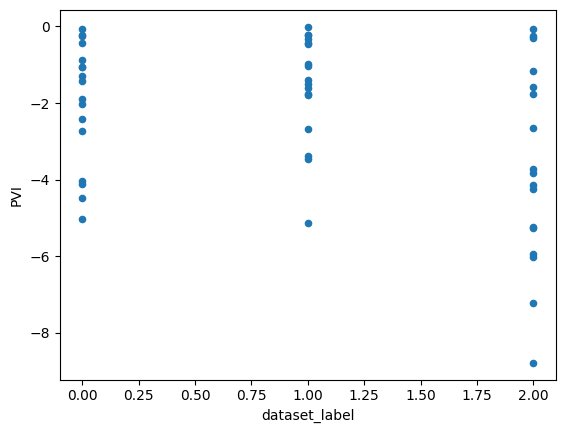

In [17]:
bellow_zero.plot(x="dataset_label", y="PVI", kind="scatter")

<AxesSubplot:xlabel='dataset_label,label'>

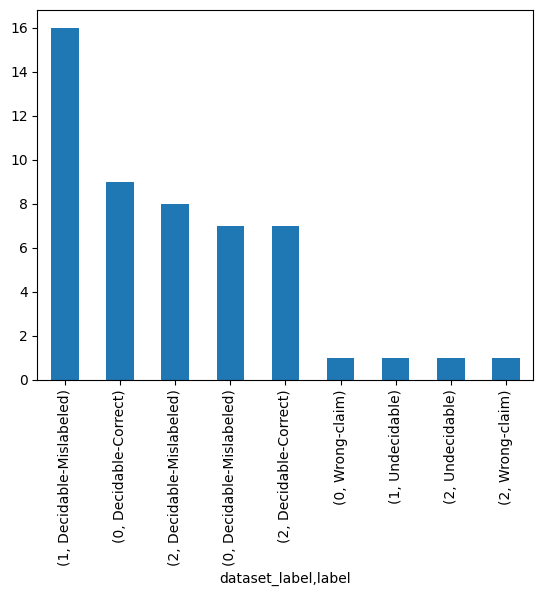

In [9]:
bellow_zero.value_counts(["dataset_label", "label"]).plot(kind="bar")

In [66]:
bellow_zero.value_counts(["dataset_label", "label"])

dataset_label  label               
1              Decidable-Mislabeled    16
0              Decidable-Correct        9
2              Decidable-Mislabeled     8
0              Decidable-Mislabeled     7
2              Decidable-Correct        7
0              Wrong-claim              1
1              Undecidable              1
2              Undecidable              1
               Wrong-claim              1
dtype: int64

In [67]:
above_zero.value_counts(["dataset_label", "label"])

dataset_label  label            
2              Decidable-Correct    17
1              Decidable-Correct    14
0              Decidable-Correct    12
               Wrong-claim           4
1              Wrong-claim           2
0              Undecidable           1
1              Undecidable           1
dtype: int64

In [38]:
np.min(bellow_zero[bellow_zero.label == "Decidable-Correct"]["PVI"].to_numpy())

-6.0231603985

In [37]:
np.min(bellow_zero[bellow_zero.label == "Decidable-Mislabeled"]["PVI"].to_numpy())

-8.7778355715

In [23]:
labels, counts = np.unique(above_zero["label"].to_numpy(), return_counts=True)
print(labels)
print(counts)
percentage = (counts / np.sum(counts))*100
print(percentage)

['Decidable-Correct' 'Undecidable' 'Wrong-claim']
[43  2  6]
[84.31372549  3.92156863 11.76470588]
